In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
img = cv2.imread('../data/supra.jpeg')
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

In [3]:
# Sobel Filter
K_size = 3

# Zero padding
pad = K_size//2
out_h = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out_v = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out_h[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
out_v[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out_h.copy()

# Sobel Horizontal
K_h = [[1., 0., -1.],[2., 0., -2.],[1., 0., -1.]]
# Sobel Vertical
K_v = [[1., 2., 1.],[0., 0., 0.], [-1., -2., -1.]]

for y in range(H):
    for x in range(W):
        out_h[pad+y, pad+x] = np.mean(K_h * (tmp[y:y+K_size, x:x+K_size]))
        out_v[pad+y, pad+x] = np.mean(K_v * (tmp[y:y+K_size, x:x+K_size]))

out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)
out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)

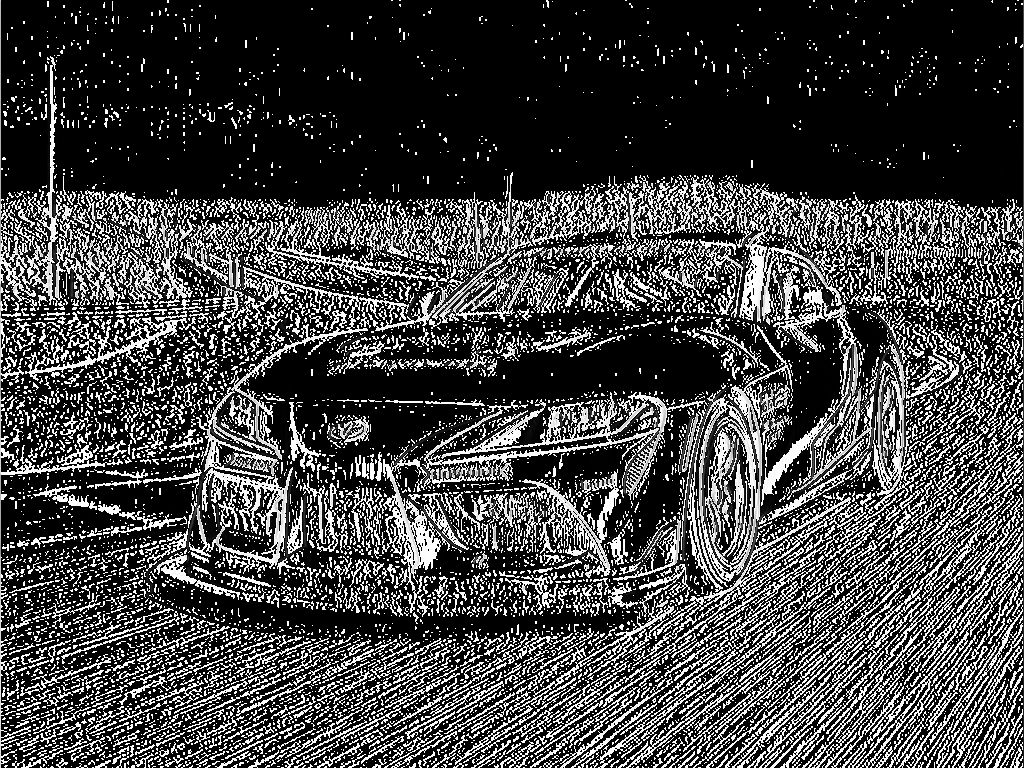

In [4]:
Image.fromarray(out_h)

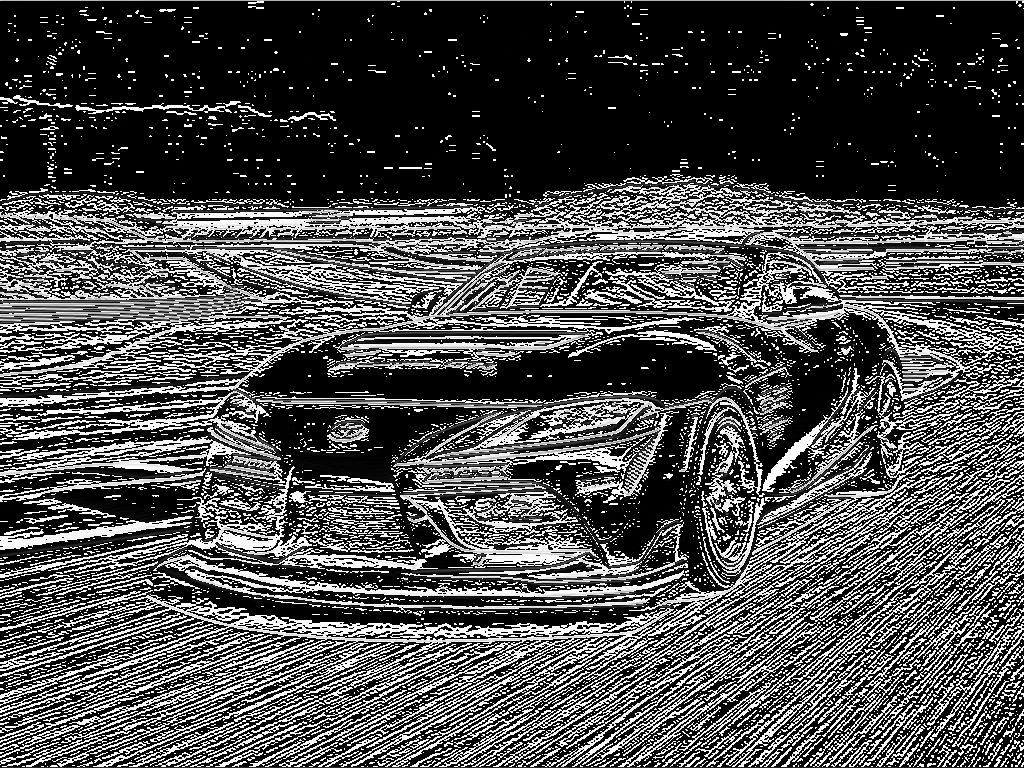

In [5]:
Image.fromarray(out_v)

In [7]:
cv2.imwrite('out15_SobelFilter_h.jpg', out_h)
cv2.imwrite('out15_SobelFilter_v.jpg', out_v)

True